<center><h3>Introduction</h3></center>

Create a 3 layer neural network where an input with two dimensions is used to predict an output. This is simply to understand how the neural network functions. A synthetic dataset will be generated in numpy and the performance of the network modelled using visual representations.

**Optimizer: Adam**
- Adam optimizer algorithm is a combination of RMSProp and Momentum
- Hyperparameters include learning rate, Beta, Epsilon

**Loss Function: Mean Absolute Error**
- Mean Absolute Error is the loss function

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3 neurons in first hidden layer/ input layer with 2 neurons
model.add(Dense(3,activation='relu', input_dim=2))

# output layer with 1 neurons
model.add(Dense(1))

# compile the model by adding the optimizer and the loss fn
model.compile(optimizer='adam',loss='mae', metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Generate random data to be trained on**

In [28]:
# Synthetic data 
import numpy as np
np.random.seed(0)
x = np.random.rand(10000,2)
y = np.random.rand(10000,1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x has samples/features:',x.shape)
print('y has samples/labels:',y.shape)

x has samples/features: (10000, 2)
y has samples/labels: (10000, 1)


**Fit the model**

- Epochs will tell how many time the training data will be used to update the weights and biases
- Batch size will decide how much of the training data will be used for each epoch to save on time
- Validation Split will ensure 80% of the data is used for training


In [29]:
history = model.fit(x_train,y_train, epochs=100, batch_size = 1000, validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2507 - val_mae: 0.2507
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.2505 - val

**Plot the training loss and the validation loss against the epoch counts**

- Epochs will tell how many time the training data will be used to update the weights and biases
- Batch size will decide how much of the training data will be used for each epoch to save on time
- Validation Split will ensure 80% of the data is used for training

Observations

- Loss/Mean Absolute Error gives the loss value after each epoch. 
- Validation Loss/Validation Mean Absolute Error gives the loss on the validation data after each data

Notes
- If the loss is lowering for the training set but increasing for the validation set, that is a sign of overfitting

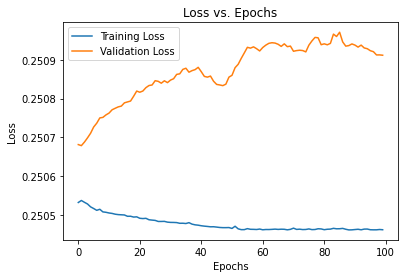

In [30]:
import matplotlib.pyplot as plt

# Extract the loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

**Plot the testing loss against the epoch counts**


In [31]:
predictions = model.predict(x_test)

#Evaluate the model on the testing set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

63/63 [==============================] - 0s 439us/step - loss: 0.2488 - mae: 0.2488
Test Loss: 0.24881511926651, Test MAE: 0.24881511926651


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


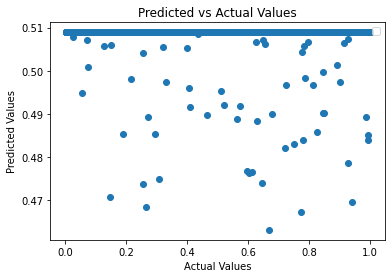

In [43]:
plt.scatter(y_test, predictions)
# Add a reference line (ideal predictions line)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()

plt.show()

Once visually assessed, the predicted values for the y-test do not properly align with the actual values. For the moment, this demonstrates a simple neural network to be modelled.